In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [11]:
data = pd.read_csv("IRIS.csv")
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [10]:
data.isnull().any().any()

False

In [13]:
group_names = data['species'].unique().tolist()
group_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

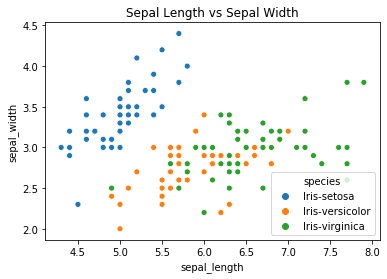

In [17]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = data, hue = 'species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

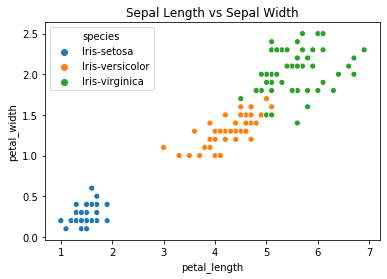

In [18]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = data, hue = 'species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [21]:
data['sepal_length'].corr(data['sepal_width'])
data['petal_length'].corr(data['petal_width'])

0.962757097050966

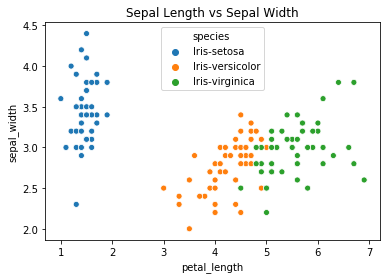

In [22]:
sns.scatterplot(x = 'petal_length', y = 'sepal_width', data = data, hue = 'species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

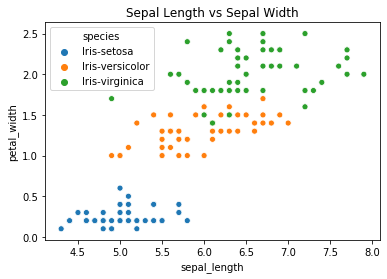

In [23]:
sns.scatterplot(x = 'sepal_length', y = 'petal_width', data = data, hue = 'species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

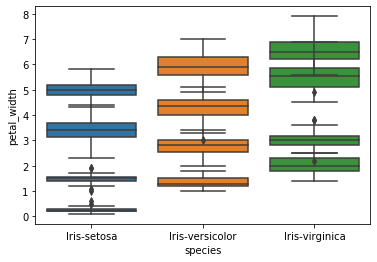

In [25]:
sns.boxplot(x = "species", y = "sepal_length", data = data)


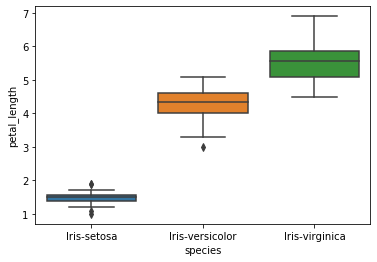

In [26]:
sns.boxplot(x = "species", y = "petal_length", data = data)


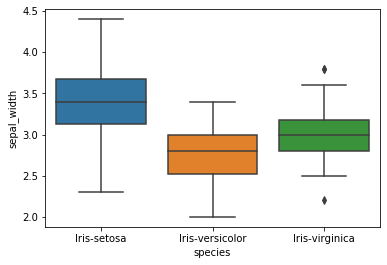

In [27]:
sns.boxplot(x = "species", y = "sepal_width", data = data)


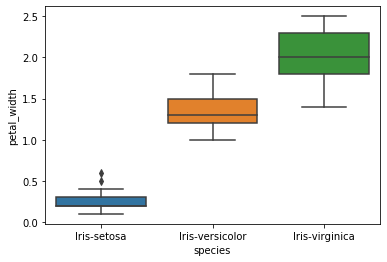

In [28]:
sns.boxplot(x = "species", y = "petal_width", data = data)

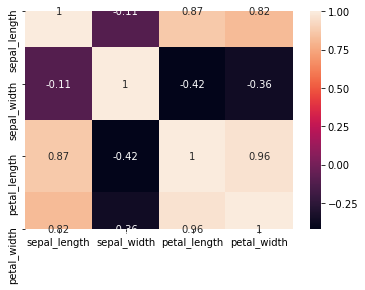

In [30]:
no_id_data = data.copy()
sns.heatmap(data = no_id_data.corr(), annot = True)
plt.show()

In [32]:
x_values = data['petal_length'].copy()
y_values = data['sepal_length'].copy()
x_train, x_test, y_train1, y_test1 = train_test_split(x_values, y_values, test_size = 0.33, random_state = 3)

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
species_dummy = pd.get_dummies(data["species"])
species_dummy.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [36]:
assigned_data = data.copy()
assigned_data = pd.concat([data, species_dummy], axis = 1)
assigned_data.head()
assigned_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [38]:
target = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
cols=list(data)
features = cols[0:4]
print(target)
print(features)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [39]:
y = assigned_data[target].copy()
X = assigned_data[features].copy()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [46]:
print(X_train.describe())
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())


       sepal_length  sepal_width  petal_length  petal_width
count    135.000000   135.000000    135.000000   135.000000
mean       5.869630     3.055556      3.814815     1.221481
std        0.814997     0.428581      1.746960     0.760733
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.500000     1.400000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.200000      6.700000     2.500000
     sepal_length  sepal_width  petal_length  petal_width
40            5.0          3.5           1.3          0.3
72            6.3          2.5           4.9          1.5
135           7.7          3.0           6.1          2.3
113           5.7          2.5           5.0          2.0
42            4.4          3.2           1.3          0.2
    sepal_length  sepal_width  petal_length  petal_width
47           4.6          3.2           1.4          0.

In [42]:
iris_classifier = DecisionTreeClassifier(max_leaf_nodes = 4, random_state = 0)
iris_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [43]:
y_prediction = iris_classifier.predict(X_test)

In [44]:
accuracy_score(y_true = y_test, y_pred = y_prediction)

1.0